# 4.1 트리
- 트리는 empty이거나, empty가 아니면 루트 R과 트리의 집합으로 구성되는데 각 트리의 루트는 R의 자식노드이다. 트리의 집합은 공집합일 수도 있다.
- 트리는 계층적 자료구조로서 파이썬 리스트(또는 다른 언어의 배열)나 연결리스트의 단점을 보완하는 자료구조이다. 
- 왼쪽자식-오른쪽형제 표현은 노드의 차수가 일정하지 않은 일반적인 트리를 구현하는 매우 효율적인 자료구조이다.
- 최대 차수가 k인 트리에 N개의 노드가 있다면, None레퍼런스 수는 Nk-(N-1)=N(k-1)+1이다. 
- Nk(총 레퍼런스의 수), N-1(트리에서 실제 부모자식을 연결하는 레퍼런스 수)
- k가 클 수록 메모리의 낭비가 심해지는 것은 물론 트리를 탐색하는 과정에서 None레퍼런스를 확인해야 하므로 비효율적.

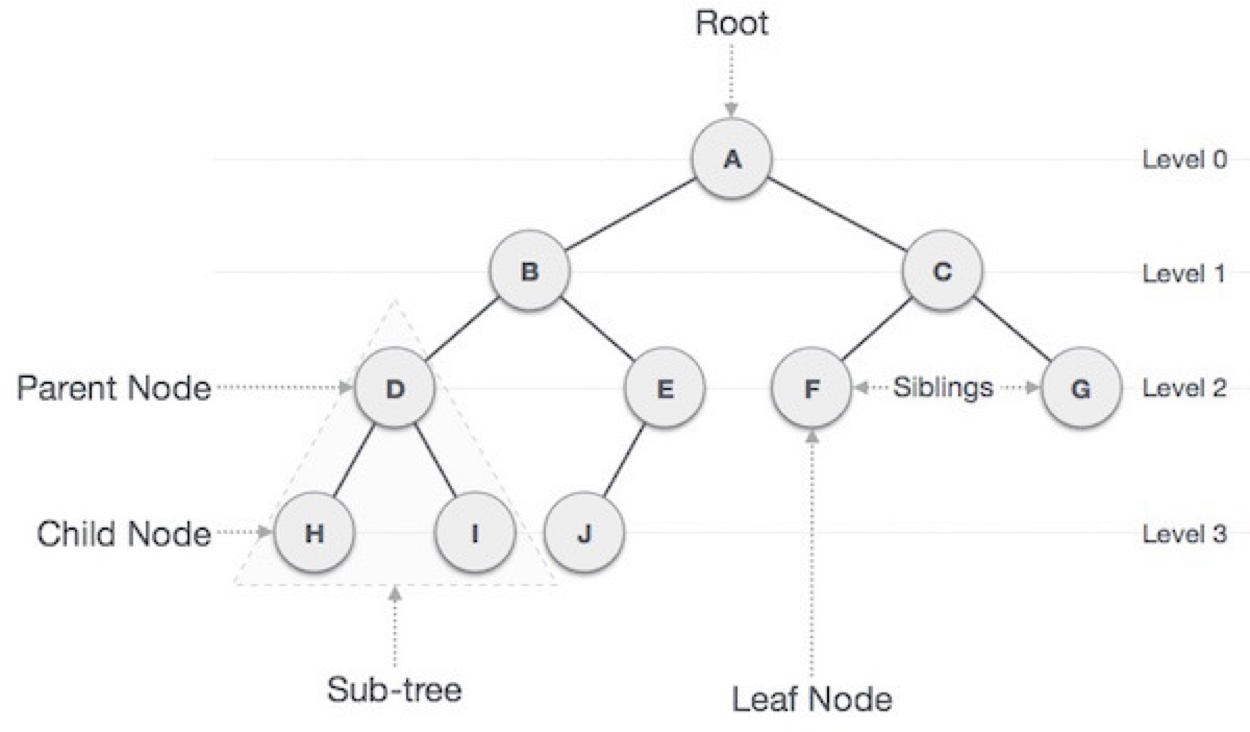
- 루트 노드(root node): 부모가 없는 노드, 트리는 하나의 루트 노드만을 가진다.
- 단말 노드(leaf node): 자식이 없는 노드, ‘말단 노드’ 또는 ‘잎 노드’라고도 부른다. (Terminal / External)
- 내부(internal) 노드: 단말 노드가 아닌 노드 (Non-Terminal)
- 간선(edge): 노드를 연결하는 선 (link, branch 라고도 부름)
- 형제(sibling): 같은 부모를 가지는 노드
- 노드의 크기(size): 자신을 포함한 모든 자손 노드의 개수
- 노드의 깊이(depth): 루트에서 어떤 노드에 도달하기 위해 거쳐야 하는 간선의 수
- 노드의 레벨(level): 트리의 특정 깊이를 가지는 노드의 집합
- 노드의 차수(degree): 하위 트리 개수 / 간선 수 (degree) = 각 노드가 지닌 가지의 수
- 트리의 차수(degree of tree): 트리의 최대 차수
- 트리의 높이(height): 루트 노드에서 가장 깊숙히 있는 노드의 깊이

# 4.2 이진트리
- 포화이진트리는 모든 이파리의 깊이가 같고 각 내부 노드가 2개의 자식을 가지는 트리이다.
- 완전이진트리는 마지막 레벨을 제외한 각 레벨이 노드들로 꽉 차있고, 마지막 레벨에는 노드들이 왼쪽부터 빠짐없이 채워진 트리이다.
- 포화이진트리는 완전이진트리이기도 하다.
- 완전이진트리를 저장하기 위해 리스트를 사용하는 경우, 자식노드들을 참조할 레퍼런스를 저장할 메모리 공간이 필요없기 때문에 효율적.
- 편향 이진트리를 리스트에 저장하는 경우, 트리의 높이가 커질 수록 메모리 낭비가 매우 심각.

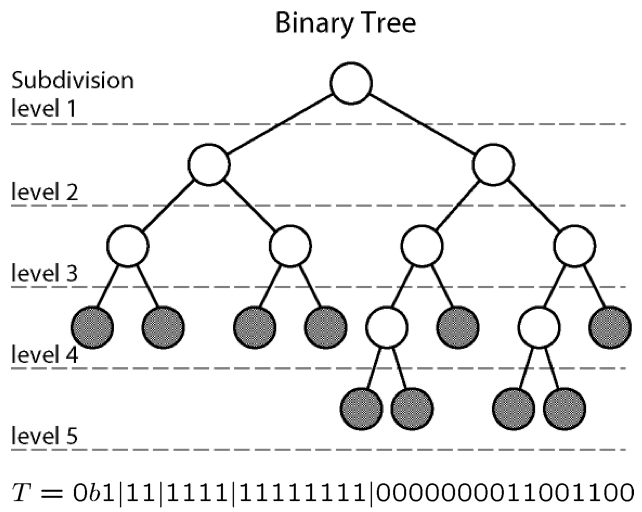
- 레벨 k에 있는 최대 노드 수는 2^k-1이다. 단, k=1,2,3...이다.
- 높이가 h인 포화 이진트리에 있는 노드 수는 2^h-1이다.
- N개의 노드를 가진 완전 이진트리의 높이는 「log2(N+1)」이다.

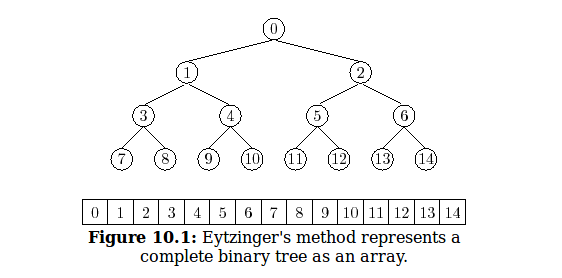

- a[i]의 부모는 a[i//2]에 있다. 단, i>1이다.
- a[i]의 왼쪽자식은 a[2i]에 있다. 단, 2i<=N이다.
- a[i]의 오른쪽자식은 a[2i+1]에 있다. 단, 2i+1<=N이다.

In [ ]:
class Node:
    def __init__(self, item, left=None, right=None): # 노드 생성자 : 항목과 왼쪽, 오른쪽 자식노드 레퍼런스
        self.item  = item 
        self.left  = left 
        self.right = right 

class BinaryTree:
    def __init__(self): # 트리 생성자
        self.root = None # 트리의 루트

    def preorder(self, n): # 전위순회
        if n != None:
            print(str(n.item),' ', end='') # 맨 먼저 노드 방문
            if n.left:
                self.preorder(n.left) # 왼쪽 서브트리 방문 후 오른쪽 서브트리 방문
            if n.right:
                self.preorder(n.right)
 
    def inorder(self, n): # 중위순회
        if n != None:
            if n.left:
                self.inorder(n.left) # 왼쪽 서브트리 방문 후 노드 방문
            print(str(n.item),' ', end='')
            if n.right:
                self.inorder(n.right)

    def postorder(self, n): # 후위순회
        if n != None:
            if n.left:
                self.postorder(n.left)
            if n.right:
                self.postorder(n.right)
            print(str(n.item),' ', end='') # 왼쪽과 오른쪽 서브트리 모두 방문 후 노드 방문
              
    def levelorder(self, root): # 레벨순회
        q = [] # 리스트로 큐 자료구조 구현
        q.append(root)
        while len(q) != 0:  
            t = q.pop(0) # 큐에서 첫 항목 삭제
            print(str(t.item), ' ', end='') # 삭제된 노드 방문
            if t.left != None: 
                q.append(t.left)  # 왼쪽 자식, 오른쪽자식 큐에 삽입
            if t.right != None: 
                q.append(t.right)    

    def height(self, root): # 트리 높이 계산
        if root == None:
            return 0
        return max(self.height(root.left), self.height(root.right))+ 1 # (root.left):두 자식노드의 높이 중 큰 높이 +1
  
    def size(self, root): # 트리 노드 수 계산
        if root is None:
            return 0
        else:
            return 1 + self.size(root.left) + self.size(root.right)  
     
    def copy_tree(self, n): # 트리 복제
        if n == None: 
            return None
        else: 
            left  = self.copy_tree(n.left)
            right = self.copy_tree(n.right)
            return self.Node(n.item, left, right)
   
    def is_equal(self, n, m): # 두 트리의 동일성 검사
        if n == None or m == None: 
            return n == m        
        if n.item != m.item: 
            return False      
        return( self.is_equal(n.left,  m.left) and  
                self.is_equal(n.right, m.right) )

In [ ]:
from binary_tree import BinaryTree, Node
if __name__ == '__main__':
    t = BinaryTree() # 이진트리 객체 t 생성 
    n1 = Node(100)   # 8개의 노드 생성  
    n2 = Node(200)
    n3 = Node(300)    
    n4 = Node(400)    
    n5 = Node(500)    
    n6 = Node(600)
    n7 = Node(700)    
    n8 = Node(800)
    n1.left  = n2  # n1의 왼쪽 자식->  n2
    n1.right = n3  # n1의 오른쪽 자식-> n3
    n2.left  = n4  # n2의 왼쪽 자식->  n4
    n2.right = n5  # n2의 오른쪽 자식-> n5
    n3.left  = n6  # n3의 왼쪽 자식->  n6
    n3.right = n7  # n3의 오른쪽 자식-> n7
    n4.left  = n8  # n4의 왼쪽 자식->  n8       
    t.root = n1    # t의 루트노드를 n1으로
    print('트리 높이 =', t.height(t.root))
    print('전위순회:\t', end='')
    t.preorder(t.root)
    print('\n중위순회:\t', end='')
    t.inorder(t.root)
    print('\n후위순회:\t', end='')
    t.postorder(t.root)
    print('\n레벨순회:\t', end='')
    t.levelorder(t.root)

# 4.3 이진트리의 연산
- 이진트리의 순회 방법은 전위순회(NLR), 중위순회(LNR), 후위순회(LRN), 그리고 레벨순회가 있다. 레벨순회는 큐 자료구조를 사용해서 구현된다.
- 이진트리의 높이는 후위순회 방식으로 계산한다.
- 스택 없이 이진트리를 순회하기 위해 노드의 None레퍼런스 대신 다음에 방문할 노드의 레퍼런스를 저장한 이진트리를 스레드 이진트리라고 한다.
- 이진트리의 높이 계산, 트리의 각 순회 방식은 트리의 모든 노드들을 방문해야 하므로 각각 O(N)시간이 소요된다.
- 이진트리의 높이 : 트리의 높이 = 1(루트 자신) + max(루트의 왼쪽 서브트리의 높이, 루트의 오른쪽 서브트리의 높이)

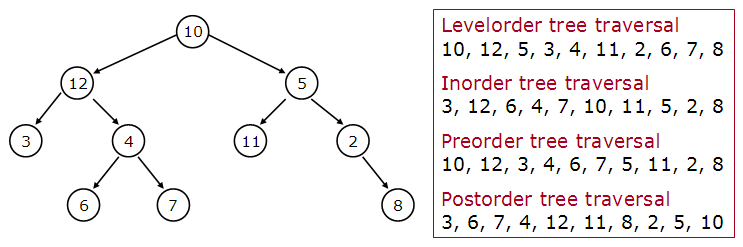

### Traversal methods
- The order in which we visit the nodes depends on the traversal method. Trees are usually traversed from left to right.
- Every traversal methods starts root Node and ends after must visit once in every Node of the Tree
#### Pre-order
- Visit the root. > Traverse the subtrees.
#### Post-order
- Traverse the subtrees. > Visit the root.
#### In-order (binary trees)
- Traverse the left subtree. > Visit the root. > Traverse the right subtree.
#### Level-order
- Visit all nodes at depth d before visiting nodes at depth d + 1.

In [ ]:
def preorder(self, n): # 전위순회
    if n != None:
        print(str(n.item),' ', end='') # 맨 먼저 노드 방문
    if n.left:
        self.preorder(n.left) # 왼쪽 서브트리 방문 후 오른쪽 서브트리 방문
    if n.right:
        self.preorder(n.right)

In [ ]:
def inorder(self, n): # 중위순회
    if n != None:
        if n.left:
            self.inorder(n.left) # 왼쪽 서브트리 방문 후 노드 방문
            print(str(n.item),' ', end='')
        if n.right:
            self.inorder(n.right)

In [ ]:
def postorder(self, n): # 후위순회
    if n != None:
        if n.left:
            self.postorder(n.left)
        if n.right:
            self.postorder(n.right)
            print(str(n.item),' ', end='') # 왼쪽과 오른쪽 서브트리 모두 방문 후 노드 방문

In [ ]:
def levelorder(self, root): # 레벨순회
    q = [] # 리스트로 큐 자료구조 구현
    q.append(root)
    while len(q) != 0:
        t = q.pop(0) # 큐에서 첫 항목 삭제
        print(str(t.item), ' ', end='') # 삭제된 노드 방문
        if t.left != None:
            q.append(t.left)  # 왼쪽 자식, 오른쪽자식 큐에 삽입
        if t.right != None: 
            q.append(t.right)

# 4.4 이진힙
- 우선순위큐는 가장 높은 우선순위를 가진 항목을 접근, 삭제, 삽입 연산을 지원하는 자료구조이다.
- 이진힙은 완전이진트리로서 부모의 우선순위가 자식의 우선순위보다 높은 우선순위 큐 자료구조이다.
- 이진힙은 키 값이 작을수록 높은 순위를 가지는 최소힙과 클수록 더 높은 우선순위를 가지는 최대힙이 있다. 
- 파이썬은 우선순위큐를 위해 headpq를 라이브러리로 제공

In [ ]:
class BHeap:          
    def __init__(self, a): # 생성자  
        self.a = a    # a[0] 사용 안함
        self.N = len(a) - 1 # 힙의 항목 수
        
    def create_heap(self): # 초기 힙 만들기     
        for i in range(self.N//2, 0, -1):
            self.downheap(i)
            
    def insert(self, key_value): # 삽입 연산
        self.N += 1
        self.a.append(key_value) # 새로운 키(항목)를 맨 끝에 저장
        self.upheap(self.N) # 위로 올라가며 힙속성 회복시키기 위해
         
    def delete_min(self): # 최솟값 삭제
        if self.N == 0:  # underflow 경우
            print('힙이 비어 있음')
            return None
        minimum = self.a[1]  # a[1]의 최솟값을 minimum에 저장하여 리턴
        self.a[1], self.a[-1] = self.a[-1], self.a[1]  # 힙의 마지막 항목과 교환
        del self.a[-1]  # 힙의 마지막 항목 삭제
        self.N -= 1
        self.downheap(1) # 힙속성을 회복시키기 위해
        return minimum
    
    def downheap(self, i): # 힙 내려가며 힙속성 회복
        while 2*i <= self.N: # i의 왼쪽자식이 힙에 있으면
            k = 2*i  # k는 왼쪽자식의 인덱스
            if k < self.N and self.a[k][0] > self.a[k+1][0]: #왼쪽과 오른쪽자식의 승자를 결정하여 k가 승자의 인덱스가됨
                k += 1  
            if self.a[i][0] < self.a[k][0]:
                break  # 현재 노드가 자식 승자보다 작으면, 루프를 중단하고
            self.a[i], self.a[k] = self.a[k], self.a[i] # 현재 노드가 자식 승자보다 크면 현재 노드와 자식 승자와 교환
            i = k   # 자식 승자가 현재 노드가 되어 다시 반복하기 위해
        
    def upheap(self, j): # 힙 올라가며 힙속성 회복
        while j > 1 and self.a[j//2][0] > self.a[j][0]: # 현재노드가 루트가 아니고 동시에 부모가 크면
            self.a[j], self.a[j//2] = self.a[j//2], self.a[j]  # 부모와 현재 노드 교환
            j = j//2  # 부모가 현재 노드가 되어 다시 반복하기 위해
           
    def print_heap(self): # 힙 출력
        for i in range(1, self.N+1): 
            print('[%2d' % self.a[i][0], self.a[i][1], ']', end='')
        print('\n힙 크기 = ', self.N)

In [ ]:
from binary_heap import BHeap
if __name__ == '__main__':
    a = [None] * 1
    a.append([90, 'watermelon'])
    a.append([80, 'pear'])
    a.append([70, 'melon'])
    a.append([50, 'lime'])
    a.append([60, 'mango'])
    a.append([20, 'cherry'])
    a.append([30, 'grape'])
    a.append([35, 'orange'])
    a.append([10, 'apricot'])
    a.append([15, 'banana'])
    a.append([45, 'lemon'])
    a.append([40, 'kiwi'])
    b = BHeap(a)
    print('힙 만들기 전:')
    b.print_heap()
    b.create_heap() # 힙 만들기
    print('최소힙:')
    b.print_heap()
    print('최솟값 삭제 후')
    print(b.delete_min())
    b.print_heap()
    b.insert([5,'apple'])
    print('5 삽입 후')
    b.print_heap()